#### IMPORTING LIBRARIES

In [29]:
# For Reading Data
import pandas as pd 
import numpy as np 
# For Data Visualization 
import matplotlib as plt 
import seaborn as sns

In [30]:
# importing utils
import sys

sys.path.append('..')
from utils.cleanning import CleanData
from utils.DataGroupby import advanced_groupby

#### READING DATA AN EXCEL FILE

In [31]:
df = pd.read_csv("E:/10 academy/Task/TellcoAnalysis/Data/Week1_challenge_data_source.csv")

In [32]:
df.head()
#this will print first five row of data 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### DATA ANALYSIS 

In [33]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [34]:
df.shape

(150001, 55)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [36]:
df.describe() 

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.149289e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082010e+14,3.365130e+10,3.546070e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366371e+10,3.572200e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304240e+19,749.000000,750.000000,1.324302e+05,2.082020e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [37]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

##### cleaning the data and dealing with null values

In [38]:
# drop all rows with null values count less that 10
Dataset = CleanData(df)
Dataset.drop_rows(drop_in_columns=['Start','Start ms','End','End ms','Dur. (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Activity Duration DL (ms)','Activity Duration UL (ms)','Total UL (Bytes)','Dur. (ms).1','Total DL (Bytes)'])



 Authomatic action.!!!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [39]:
# drop all rows with null that cant be replaced by mean
Dataset.drop_rows(drop_in_columns=['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer','Handset Type'])


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [40]:

# fill columns with mean with null less or about 1000
Dataset.fill_with_mean(fill_columns=['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'])

# additional fill with mean
Dataset.fill_with_mean(fill_columns=['Avg RTT DL (ms)','Avg RTT UL (ms)'])

# drop columns with more than 50% null
Dataset.drop_unwanted_column(unwanted_columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                                            'HTTP DL (Bytes)','HTTP UL (Bytes)', 
                                     
                                            'Nb of sec with 31250B < Vol DL < 125000B',
                                            'Nb of sec with 37500B < Vol UL' ,
                                            'Nb of sec with 6250B < Vol UL < 37500B',
                                            'Nb of sec with 125000B < Vol DL',         
                                            'Nb of sec with 1250B < Vol UL < 6250B',   
                                            'Nb of sec with 6250B < Vol DL < 31250B'])



,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [41]:
Dataset.df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [42]:
clean_data = Dataset.df
clean_data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [43]:
clean_data.shape

(148346, 45)

In [44]:
# saving clean data dataset
clean_data.to_csv('../Data/clean_data.csv')

In [45]:
clean_data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


<AxesSubplot:>

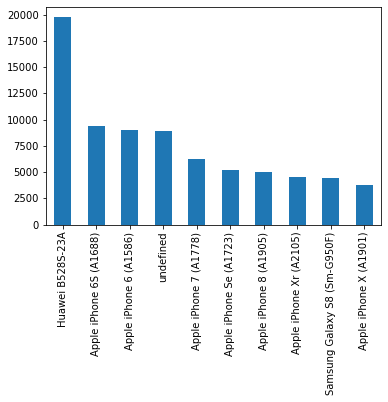

In [46]:
#the top 10 handsets used by the customers.
clean_data['Handset Type'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

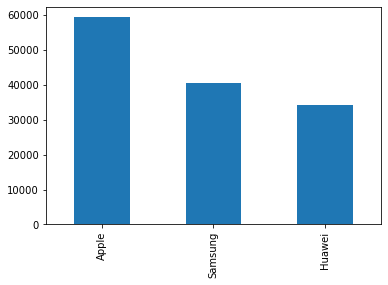

In [50]:
#top 3 handset manufacturers 
clean_data['Handset Manufacturer'].value_counts()[:3].plot(kind='bar')

In [52]:
# the top 5 handsets per top 3 handset manufacturer
advanced_groupby(clean_data,'Handset Manufacturer','Handset Type',3,5)

{'Apple': ['Apple iPad (A1823)',
  'Apple iPad (A1954)',
  'Apple iPad 2 (A1396)',
  'Apple iPad 3 (A1430)',
  'Apple iPad 4 (A1460)'],
 'Samsung': ['Samsung 2018 Galaxy J4',
  'Samsung Galaxy A3 (Sm-A300X)',
  'Samsung Galaxy A3 (Sm-A310X)',
  'Samsung Galaxy A3 (Sm-A320)',
  'Samsung Galaxy A5 (Sm-A500X)'],
 'Huawei': ['Huawei Ale-Ul00',
  'Huawei Ascend G6',
  'Huawei Ascend G620S',
  'Huawei Ascend Mate7',
  'Huawei Ascend P7']}